In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [ ]:
def apply_svd (data,k):

  scaler= StandardScaler()
  scaled_data= scaler.fit_transform(data)

  U, S, VT= np.linalg.svd(scaled_data, full_matrices=False)

  U_k=U[:, :k]
  S_k=np.diag(S[:k])
  VT_k=VT[:k, :]

  reduced_data=np.dot( U_k, S_k)
  reconstructed=np.dot(reduced_data, VT_k)

  return scaled_data, reconstructed

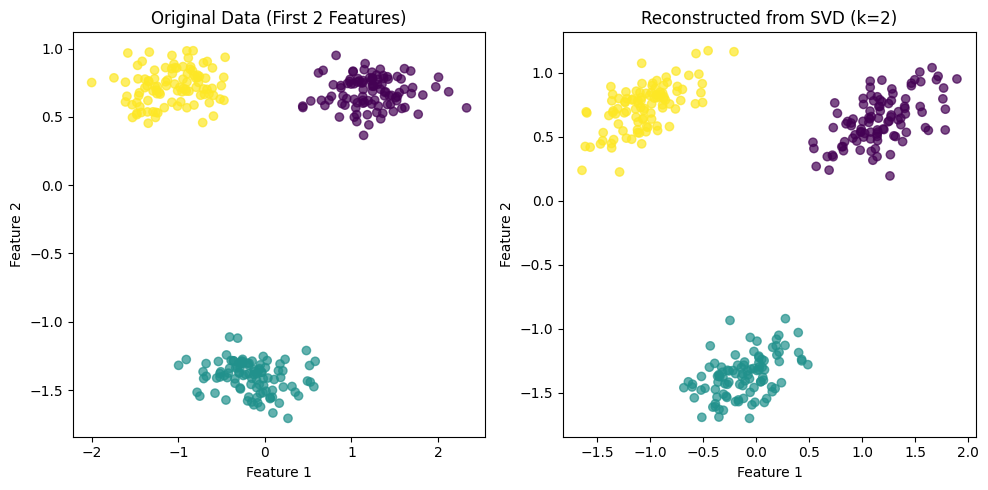

In [ ]:
def main():

  X, y= make_blobs(n_samples=300, centers=3, n_features=5, random_state=42)

  original, reconstructed= apply_svd(X, k=2)

  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.scatter(original[:, 0], original[:, 1], c=y, cmap='viridis', alpha=0.7)
  plt.title('Original Data (First 2 Features)')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')

  plt.subplot(1, 2, 2)
  plt.scatter(reconstructed[:, 0], reconstructed[:, 1], c=y, cmap='viridis', alpha=0.7)
  plt.title('Reconstructed from SVD (k=2)')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')

  plt.tight_layout()
  plt.show()

if __name__ == "__main__":
  main()
